### Black-hole binary formation channels with gaussian mixtures.
#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?


In [73]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble'] = r'\usepackage{type1cm}'
import numpy as np
from sklearn.mixture import GaussianMixture

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=13, usetex=True)

In [74]:
X = np.load("../solutions/formationchannels.npy")

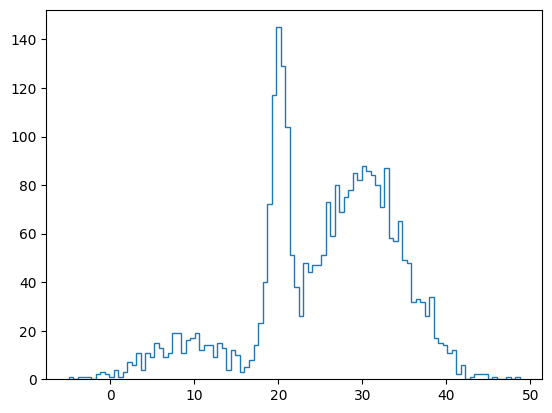

In [75]:
plt.hist(X, bins=100, histtype='step')
plt.show()


2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.


4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

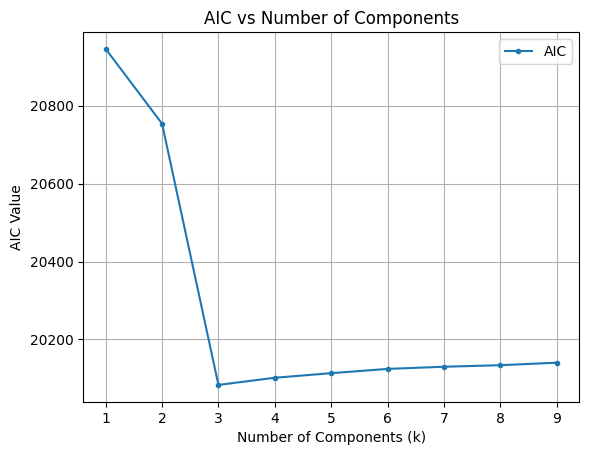

In [76]:
#GaussianMixture
models = [GaussianMixture(n_components=k).fit(X.reshape(-1, 1)) for k in range(1, 10)]

AIC = [m.aic(X) for m in models]

plt.plot(range(1, 10), AIC, label='AIC', marker='.')
plt.xlabel('Number of Components (k)')
plt.ylabel('AIC Value')
plt.title('AIC vs Number of Components')
plt.legend()
plt.grid()
plt.show()

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.



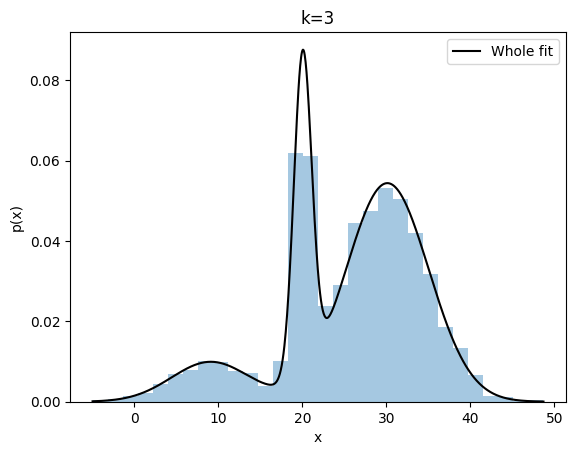

In [80]:
gmm_best = models[np.argmin(AIC)]


x = np.linspace(min(np.array(X)), max(np.array(X)), 1000)
#calculates the log probability density for each point in x according to the fitted gmm
logprob = gmm_best.score_samples(x.reshape(-1, 1)) #log for numerical reasons 
pdf = np.exp(logprob)

# Compute PDF for each component
#This method computes the probability that each sample belongs to each of the K Gaussian components in the mixture.
responsibilities = gmm_best.predict_proba(x.reshape(-1, 1)) 
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

# Plot PDF of whole model
plt.plot(x, pdf, '-k', label='Whole fit')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'k={gmm_best.n_components}')
plt.legend()
plt.show()


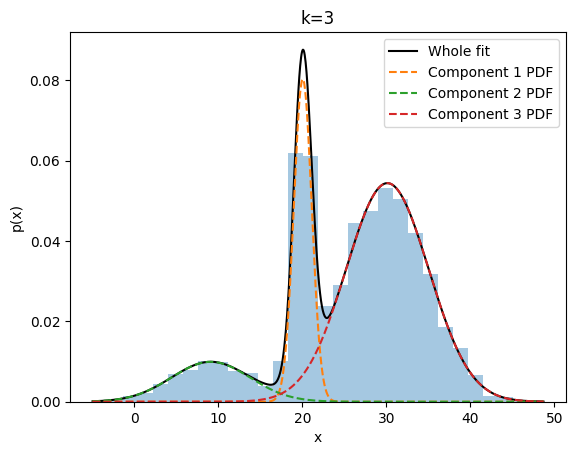

In [81]:
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

# Plot PDF of whole model
plt.plot(x, pdf, '-k', label='Whole fit')

for i in range(pdf_individual.shape[1]):
    plt.plot(x, pdf_individual[:, i], '--', label=f'Component {i+1} PDF')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'k={gmm_best.n_components}')
plt.legend()
plt.show()



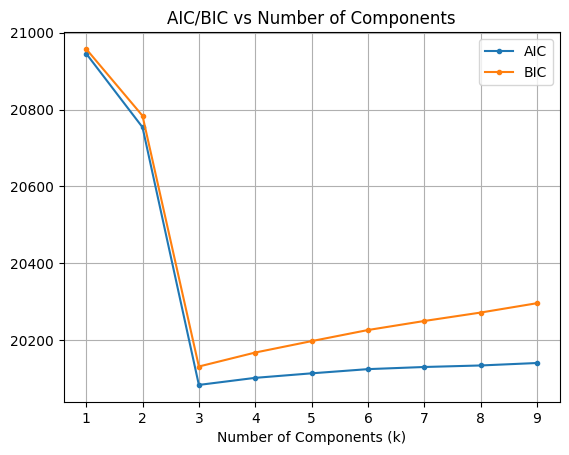

In [84]:
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]
# Plot these metrics
plt.plot(range(1, 10), AIC, label='AIC', marker='.')
plt.plot(range(1, 10), BIC, label='BIC', marker='.')
plt.xlabel('Number of Components (k)')
plt.title('AIC/BIC vs Number of Components')
plt.legend()
plt.grid()
plt.show()